Cui Ding
Irma Krob

P.S. we did this part in Google Colab - it is important to think about the csv files and upload them if needed ("baseline.csv, ppl_pre.cvs and ppl_post.csv.")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import  torch

torch.cuda.is_available()

True

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dfbaseline = pd.read_csv("baseline.csv")

dfbaseline.head()

,Baseline
0,56.61
1,49.93
2,45.33
3,35.25
4,28.44


In [5]:
dfpre = pd.read_csv("ppl_pre.csv")
dfpre.head()

,Prenorm
0,44.83
1,30.73
2,26.49
3,23.63
4,21.90


In [6]:
dfpost = pd.read_csv("ppl_post.csv")
dfpost.head()

,Postnorm
0,41.56
1,30.24
2,27.02
3,24.75
4,23.56


In [7]:
df_final = pd.concat([dfbaseline, dfpre, dfpost], axis=1)

In [8]:
df_final.head()

,Baseline,Prenorm,Postnorm
0,56.61,44.83,41.56
1,49.93,30.73,30.24
2,45.33,26.49,27.02
3,35.25,23.63,24.75
4,28.44,21.90,23.56


In [9]:
step_size = 500
start_value = 500
df_final.insert(0, 'Validation ppl', range(start_value, start_value + len(df_final)*step_size, step_size))

print(df_final.head())

   Validation ppl  Baseline  Prenorm  Postnorm
0             500     56.61    44.83     41.56
1            1000     49.93    30.73     30.24
2            1500     45.33    26.49     27.02
3            2000     35.25    23.63     24.75
4            2500     28.44    21.90     23.56


<Axes: xlabel='Validation ppl', ylabel='value'>

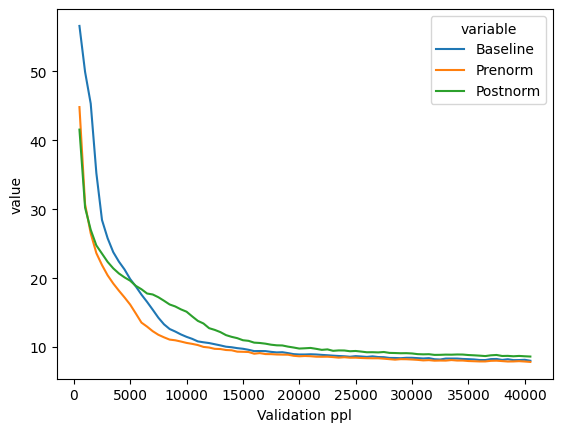

In [16]:
sns.lineplot(x = "Validation ppl",y = 'value',hue = 'variable', data=pd.melt(df_final,'Validation ppl'))

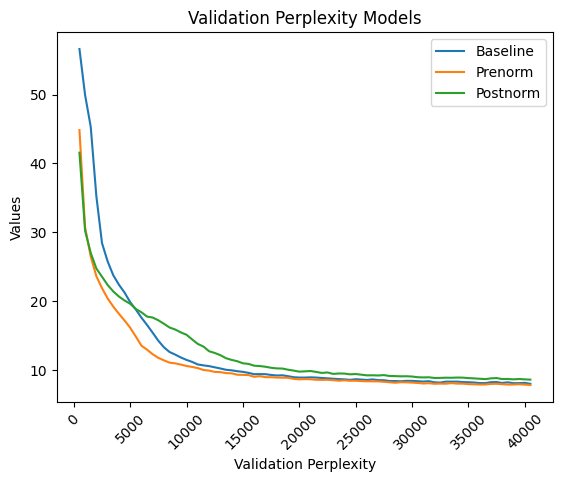

In [11]:
df_final.plot(x='Validation ppl', y=['Baseline', 'Prenorm', 'Postnorm'], 
        kind='line')

plt.xlabel('Validation Perplexity')
plt.ylabel('Values')
plt.title('Validation Perplexity Models')
plt.xticks(rotation=45)
plt.show()